# DIRECTING CUSTOMERS TO SUBSCRIPTION THROUGHT APP BEHAVIOUS ANALYSIS

## Importing Data

In [2]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/appdata10.csv')

## EDA

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
# The hour datatype is 'object' so we need to change it to a numerical value to use it later
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [5]:
df['hour'].dtype

dtype('int32')

In [6]:
# Let's make another dataframe to visualise all the numerical values/columns
df2 = df.drop(['user', 'screen_list', 'enrolled_date','first_open', 'enrolled'],axis=1)
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Data Visualization

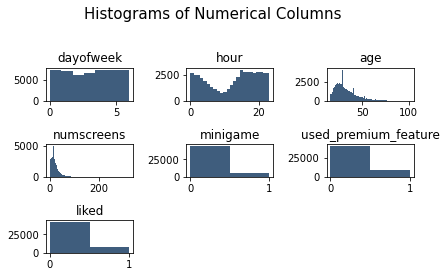

In [36]:
# Histogram

plt.suptitle('Histograms of Numerical Columns', fontsize=15)

for i in range(1, df2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    
    f.set_title(df2.columns.values[i - 1])

    vals = np.size(df2.iloc[:, i - 1].unique())
    
    plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D',)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation between numerical values and enrollment'}>

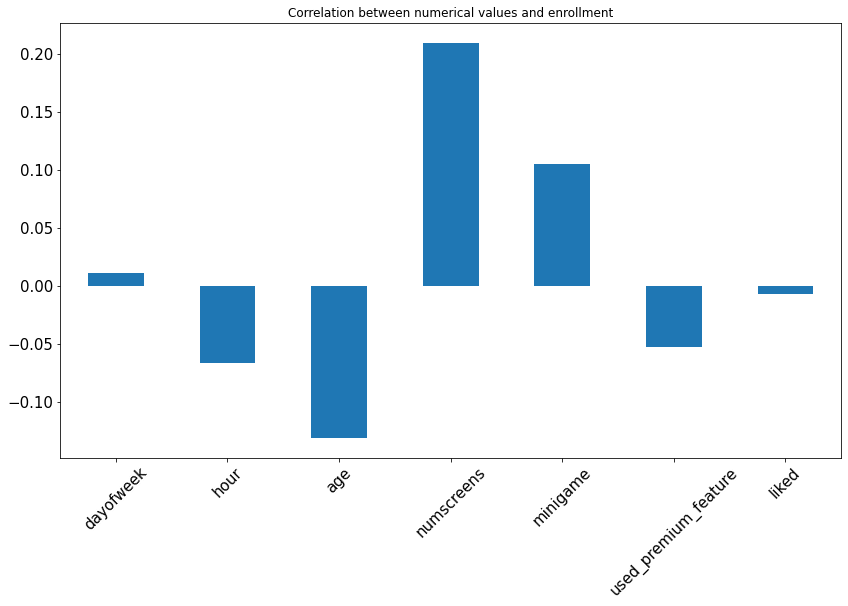

In [22]:
# Correlation between numerical columns and the enrollment

df2.corrwith(df.enrolled).plot.bar(figsize=(14,8),
                  title = 'Correlation between numerical values and enrollment',
                  fontsize = 15, rot = 45)

<AxesSubplot:>

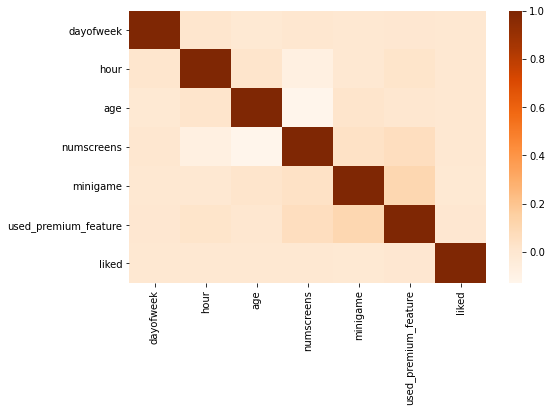

In [51]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),cmap='Oranges')

## Feature Engineering

We want to find the optimal time limit for our prediction model (we need a date range limit on our response variable). 
To do so, we are going to plot the distribution of the differences between the first open and the enrollment date.

In [7]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
# Let's change the object type columns to date time type.
df['first_open'] = [parser.parse(x) for x in df['first_open']]

In [9]:
df["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in df["enrolled_date"]]

In [10]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [11]:
# Now let's create the a new column : the difference column
df['difference'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

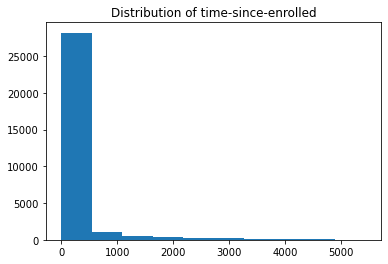

In [12]:
plt.hist(df['difference'].dropna())
plt.title('Distribution of time-since-enrolled')
plt.show()

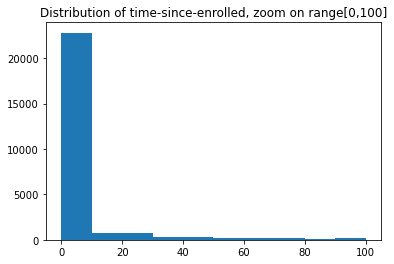

In [77]:
plt.hist(df['difference'].dropna(),range=[0,100])
plt.title('Distribution of time-since-enrolled, zoom on range[0,100]')
plt.show()

In [13]:
# 48 hours is a good time scale for our response variable (after 2 days, it's not very relevant as we can see on the graphs)
df.loc[df.difference > 48, 'enrolled'] = 0

In [14]:
# Now we don't need to use most of the date time type columns anymore.
df = df.drop(['difference','enrolled_date','first_open'],axis=1)

There are too many 'screens' for us to analyse the data from. We only want the most used/important ones : the top screens.

In [15]:
# For this, let's us the dataset called topscreens
pd.read_csv('datasets/top_screens.csv')

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [16]:
top_screens = pd.read_csv('datasets/top_screens.csv').top_screens.values # getting only the relevant values of the table as an np array: the top_screens column values 

In [17]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

Let's see which user (so each row in our df) goes/uses one or several of the top screens we just selected.

In [18]:
# Mapping screens to fields
df['screen_list'] = df.screen_list.astype(str) + ','

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+",", "")

In [19]:
df['Other'] = df.screen_list.str.count(",")
df = df.drop(columns=['screen_list'])

Getting rid of the correlation between screens. We have to group the screens in funnels.

In [101]:
# Saving Screens

In [20]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [21]:
df['SavingCount'] = df[savings_screens].sum(axis=1)

In [22]:
df = df.drop(savings_screens,axis=1)

In [23]:
# Credit Screens

In [24]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(cm_screens,axis=1)

In [25]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(cc_screens,axis=1)

In [26]:
# Loan Screens

In [27]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(loan_screens,axis=1)

In [28]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [29]:
# Saving the dataframe
df.to_csv('datasets/my_new_appdata10.csv', index = False)

## Prediction Model

In [30]:
model_df = pd.read_csv('datasets/my_new_appdata10.csv')

In [31]:
model_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


### Data Pre-processing

In [35]:
X = model_df.drop('enrolled',axis=1)
y = model_df['enrolled']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
train_identifier = X_train['user']
X_train = X_train.drop('user',axis=1)
test_identifier = X_test['user']
X_test = X_test.drop('user',axis=1)

### Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.fit_transform(X_test))

In [44]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.972325,1.404166,-1.175102,-0.963062,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789
39996,-1.489818,0.328622,-0.898034,-1.090390,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.418852,-0.260877,0.057524,-0.289185,0.309800
39997,-0.012532,-0.881364,-0.620967,1.392493,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,3.976153,-0.763372,-0.289185,-1.165789
39998,0.479896,0.059736,-0.436255,-1.090390,2.883254,-0.457453,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789


In [45]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [46]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [47]:
X_train = X_train2  # to evaluate and compare the results later on
X_test = X_test2  # idem

## Model building

In [48]:
from sklearn.linear_model import LogisticRegression

### Fitting Model to the Training Set

In [55]:
classifier = LogisticRegression(random_state=0, penalty='l2') # the penalty is here to avoid the correlation between 2 screens

In [56]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting test set

In [57]:
prediction = classifier.predict(X_test)

### Evaluating results

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 
# Here, accuracy_score, f1_score, precision_score, recall_score is another method to call out the metrics reported in the 
# classification report(used down below)

In [60]:
cm = confusion_matrix(y_test, prediction)

In [61]:
accuracy_score(y_test, prediction)

0.7679

Test Data Accuracy: 0.768


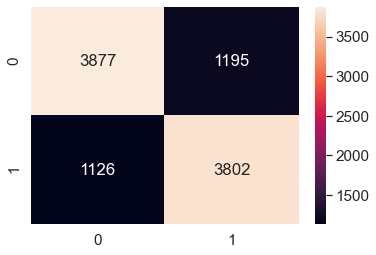

In [69]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.3f" % accuracy_score(y_test, prediction))

In [74]:
# Using the classification report

In [70]:
from sklearn.metrics import classification_report

In [72]:
print('Classification report')
print(classification_report(y_test, prediction))

Classification report
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



### Applying k-Fold Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
accuracies = cross_val_score(X = X_train, y = y_train, estimator = classifier, cv=10)

In [77]:
print(accuracies)

[0.76875 0.7665  0.77675 0.76625 0.76475 0.76775 0.7625  0.76725 0.7725
 0.75875]


In [78]:
print(accuracies.mean(), accuracies.std()*2)

0.767175 0.009442060156554829


This is a very consistent and accurate algorithm!

### Formatting the final results

Here we we combine the predictive results, the actual results and th identity of the users.

In [83]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [84]:
final_results['predicted_results'] = prediction

In [85]:
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


The reason behind this final step is so that we can compare the results with the original source : here it is meant to know identify which user we want to predict from (in order then to target him/her or not).